# Example of ZCA Whitening 

- [Reference](https://www.kdnuggets.com/2018/10/preprocessing-deep-learning-covariance-matrix-image-whitening.html/3)

In [1]:
import pandas as pd 
import cv2 # pip install opencv-python 
import numpy as np 
import sklearn 
import skimage # pip install scikit-image
from matplotlib import pyplot as plt
from skimage.transform import rotate
from skimage.util import random_noise
import random
from skimage.transform import warp, AffineTransform

In [2]:
train = pd.read_csv('./train.csv')
train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [3]:
train = train.iloc[:,3:].values.reshape(-1,28,28).astype(np.float32)  
train /= 255.0 # normalize 

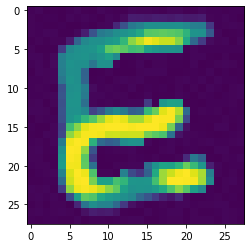

In [4]:
sample = train[1000]
plt.imshow(sample)

In [5]:
sample = sample - sample.mean(axis=0)

In [6]:
# mean is close enough to zero that we can consider that it worked! 
sample.mean(axis = 0)

array([-8.3153803e-11,  1.6630761e-10,  3.3261521e-10,  2.1619988e-10,
       -1.1708055e-08,  2.1287374e-09, -4.4703484e-08, -2.1287374e-09,
       -1.0643687e-08,  3.4059799e-08, -1.7029899e-08, -2.3416110e-08,
        2.1287374e-08, -6.3862120e-09, -3.1931059e-08,  1.9158636e-08,
        1.0643687e-08, -2.1287374e-09, -8.5149496e-09,  1.2772424e-08,
       -2.2351742e-08,  1.8094267e-08,  2.1287374e-09, -7.7166726e-09,
       -4.9892281e-11,  9.9784563e-11,  2.3283064e-10,  3.9913825e-10],
      dtype=float32)

In [7]:
cov = np.cov(sample, rowvar = False)
cov.shape

(28, 28)

In [8]:
# calculate the singular values and vectors of the covariance matrix and use them to rotate our dataset
U,S,V = np.linalg.svd(cov) 

In [9]:
U.shape, S.shape

((28, 28), (28,))

In [11]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(sample.T).T

In [12]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print('min:', X_ZCA_rescaled.min()) 
print('max:', X_ZCA_rescaled.max()) 


min: 0.0
max: 1.0


# ZCA Whitened image

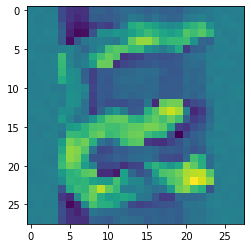

In [13]:
plt.imshow(X_ZCA_rescaled)

In [14]:
X_ZCA_rescaled.shape

(28, 28)

In [16]:
# reshape it so that we can use it for our CNN 
X_ZCA_rescaled = X_ZCA_rescaled.reshape((28,28,1)) 

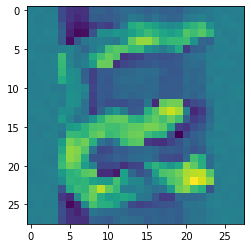

In [17]:
plt.imshow(X_ZCA_rescaled) 

(28, 28)


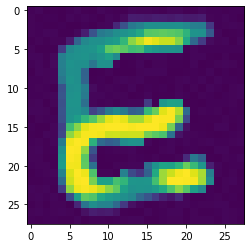

In [18]:
# putting everything together 
def zca_whitening(sample): 
    sample = sample - sample.mean(axis=0)
    cov = np.cov(sample, rowvar = False)
    U,S,V = np.linalg.svd(cov) 
    epsilon = 0.1
    X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(sample.T).T
    X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
    X_ZCA_rescaled = X_ZCA_rescaled.reshape((28,28,1)) 
    return X_ZCA_rescaled 

demo = train[1000] 
zca_whitened = zca_whitening(demo)
plt.imshow(demo)
print(demo.shape)